In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from skimage.io import imread
# from skimage.transform import resize

# Reshaping the data and storing

In [4]:
# import os
# import cv2
# from PIL import Image
# import pandas as pd

# DATADIR = '/content/drive/MyDrive/melanoma_data/train'
# CATEGORIES = ['benign', 'malignant']
# SAVE_DIRECTORY = '/content/drive/MyDrive/melanoma_data/Melanoma_data/train'
# SAVE_CATEGORIES = ['benign', 'malignant']

# for i in range(2):
#   class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
#   path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
#   for img in os.listdir(path):
#     img_array = imread(os.path.join(path, img))

#     # Resize image
#     Resize_image = Image.fromarray(np.array(img_array))
#     Resize_image = Resize_image.resize((224,224))

#     # set the path
#     image_path1 = os.path.join(SAVE_DIRECTORY, SAVE_CATEGORIES[i])
#     image_path2 = os.path.join(image_path1, img)

#     Resize_image.save(image_path2)
#     # cv2.imwrite(image_path2, Resize_image.astype(np.uint8))


In [5]:
# DATADIR = '/content/drive/MyDrive/melanoma_data/test'
# CATEGORIES = ['benign', 'malignant']
# SAVE_DIRECTORY = '/content/drive/MyDrive/melanoma_data/Melanoma_data/test'
# SAVE_CATEGORIES = ['benign', 'malignant']

# for i in range(2):
#   class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
#   path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
#   for img in os.listdir(path):
#     img_array = imread(os.path.join(path, img))

#     # Resize image
#     Resize_image = Image.fromarray(np.array(img_array))
#     Resize_image = Resize_image.resize((224,224))

#     # set the path
#     image_path1 = os.path.join(SAVE_DIRECTORY, SAVE_CATEGORIES[i])
#     image_path2 = os.path.join(image_path1, img)

#     Resize_image.save(image_path2)
#     # cv2.imwrite(image_path2, Resize_image.astype(np.uint8))


In [6]:

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# to flatten an array - a.flatten() where a is a numpy arrayy
target = []
images = []

DATADIR = '/content/drive/MyDrive/melanoma_data/Melanoma_data/train/'
CATEGORIES = ['benign', 'malignant']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # img_resized = resize(img_array, (224,224,3))
    images.append(img_array)
    target.append(i)

# flat_data = np.array(flat_data)
train_target = np.array(target)
train_images = np.array(images)

In [7]:
target = []
images = []

DATADIR = '/content/drive/MyDrive/melanoma_data/Melanoma_data/test/'
CATEGORIES = ['benign', 'malignant']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # img_resized = resize(img_array, (224,224,3))
    images.append(img_array)
    target.append(i)

# flat_data = np.array(flat_data)
test_target = np.array(target)
test_images = np.array(images)

In [8]:
X_train = train_images
X_test = test_images
y_train = train_target
y_test = test_target

# true values
y_train_ = train_target
y_test_ = test_target

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images, target, test_size = 0.2, stratify = target, random_state = 2)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (300, 224, 224, 3)
X_test Shape:  (50, 224, 224, 3)
y_train Shape:  (300, 2)
y_test Shape:  (50, 2)


##Defining Error Metrics

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = ['Benign', 'Malignant']
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, precision_score, f1_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

def evaluate(model, X, y_true, y_pred):

  # classification report
  print(classification_report(y_true, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  print("CONFUSION MATRIX: \n", plot_confusion_matrix(cm))

  # Accuracy score
  accuracy = accuracy_score(y_true, y_pred)
  print("ACCURACY: ", accuracy)

  # Recall Score
  recall = recall_score(y_true, y_pred)
  print("RECALL: ", recall)

  # Precision and f1 score
  print("PRECISION: ", precision_score(y_true, y_pred))
  print("F1: ", f1_score(y_true, y_pred))

  # Assuming y_true contains the ground truth labels and y_pred_prob contains the predicted probabilities
  y_pred_prob = model.predict(X)[:, 1]
  fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_prob)

  # Plotting the ROC curve
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.show()

  # Plotting the Precision-Recall curve
  plt.plot(recall, precision)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()



In [15]:
!pip install simple_colors

In [16]:
from simple_colors import *
def error_metrics_record(model,y_train, y_train_pred, y_test, y_test_pred, x_test, x_train):
  print('------------------------------------------------------')
  print('------------------------------------------------------')
  print(red('TRAIN DATA EVALUATION', 'bold'))
  evaluate(model, x_train, y_train, y_train_pred)
  print('------------------------------------------------------')
  print(red('TEST DATA EVALUATION', 'bold'))
  evaluate(model, x_test, y_test, y_test_pred)
  print('------------------------------------------------------')
  print('------------------------------------------------------')

In [17]:
from sklearn.metrics import classification_report

def results(model, X_test, X_train, y_train_, y_test_):
    # Prediction of values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # labeling the values
    y_test_pred_ = []
    for i in range(len(y_test_pred)):
        if y_test_pred[i][0] > y_test_pred[i][1]:
            y_test_pred_.append(0)
        else:
            y_test_pred_.append(1)

    y_train_pred_ = []
    for i in range(len(y_train_pred)):
        if y_train_pred[i][0] > y_train_pred[i][1]:
            y_train_pred_.append(0)
        else:
            y_train_pred_.append(1)

    # evaluation
    error_metrics_record(model,y_train_, y_train_pred_, y_test_, y_test_pred_, X_test, X_train)

# Xception

In [47]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the Xception model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
Xcep_model = Sequential()
Xcep_model.add(base_model)
Xcep_model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dropout(0.3))
Xcep_model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
Xcep_model.add(Dense(512, activation = 'relu'))
Xcep_model.add(Dense(32, activation = 'relu'))
Xcep_model.add(Dense(2, activation='softmax'))

# model summary
Xcep_model.summary()

# Compile the model
Xcep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Xcep_model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_14 (Flatten)        (None, 100352)            0         
                                                                 
 dense_60 (Dense)            (None, 1024)              102761472 
                                                                 
 dense_61 (Dense)            (None, 512)               524800    
                                                                 
 dense_62 (Dense)            (None, 32)                16416     
                                                                 
 dense_63 (Dense)            (None, 2)                 66        
                                                                 
Total params: 124,164,234
Trainable params: 103,302,7

10/10 [==============================] - 1s 134ms/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



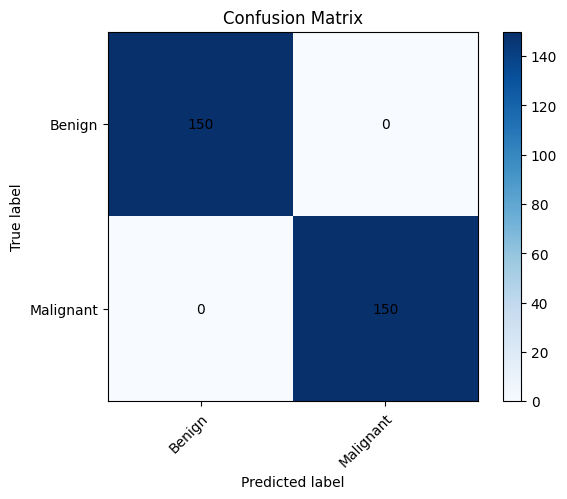

CONFUSION MATRIX: 
 None
ACCURACY:  1.0
RECALL:  1.0
PRECISION:  1.0
F1:  1.0
10/10 [==============================] - 1s 135ms/step


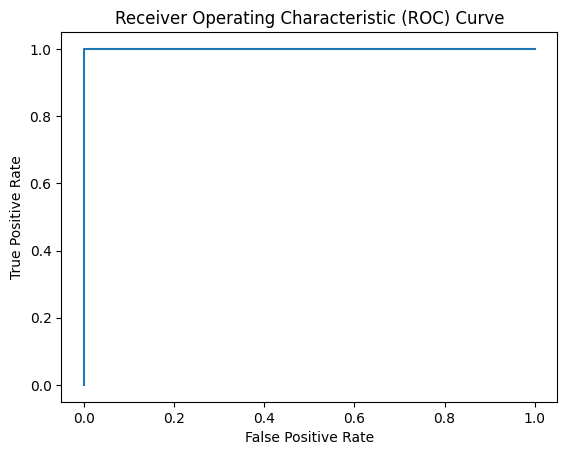

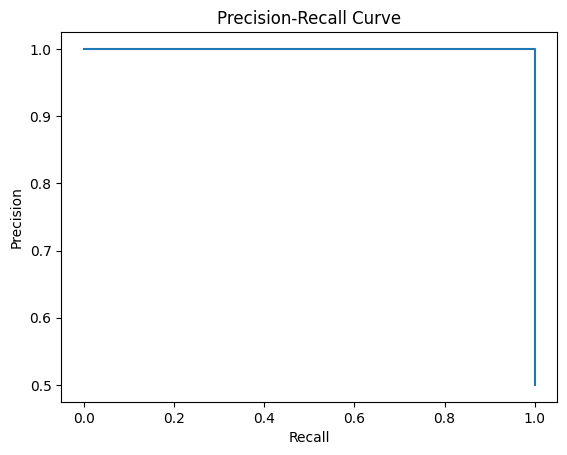

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.77      0.68      0.72        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



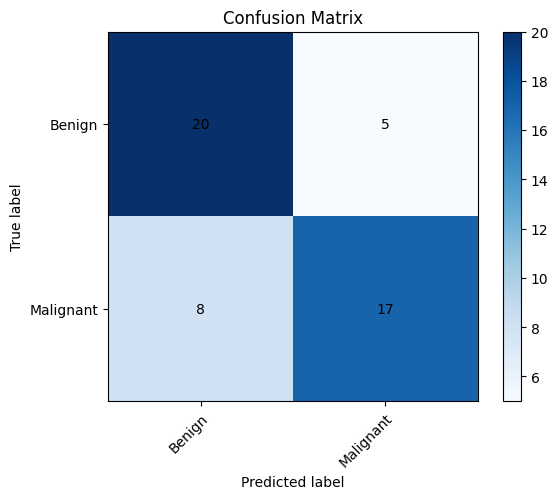

CONFUSION MATRIX: 
 None
ACCURACY:  0.74
RECALL:  0.68
PRECISION:  0.7727272727272727
F1:  0.7234042553191491
2/2 [==============================] - 0s 172ms/step


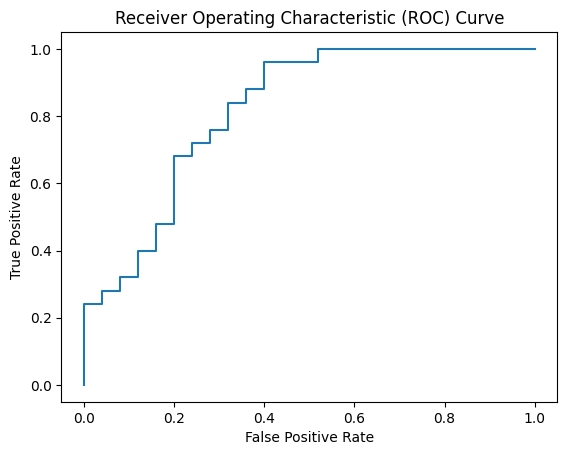

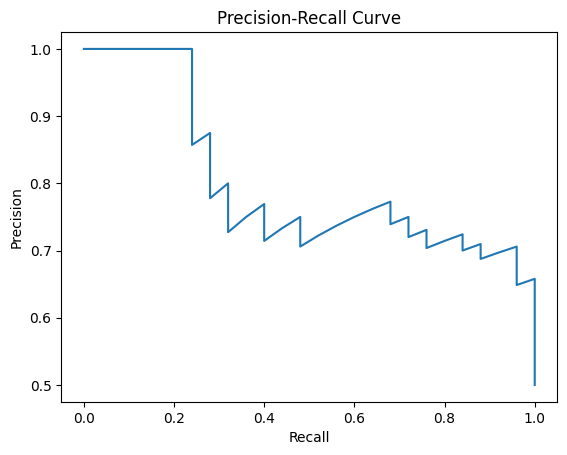

------------------------------------------------------
------------------------------------------------------


In [48]:
results(Xcep_model, X_test, X_train, y_train_, y_test_)

In [60]:
y_test_pred = Xcep_model.predict(X_test)
y_train_pred = Xcep_model.predict(X_train)

# labeling the values
y_test_pred_Xcep_model = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] > y_test_pred[i][1]:
        y_test_pred_Xcep_model.append(0)
    else:
        y_test_pred_Xcep_model.append(1)

y_train_pred_Xcep_model = []
for i in range(len(y_train_pred)):
    if y_train_pred[i][0] > y_train_pred[i][1]:
        y_train_pred_Xcep_model.append(0)
    else:
        y_train_pred_Xcep_model.append(1)


10/10 [==============================] - 1s 129ms/step


In [77]:
y_test_pred_Xcep = Xcep_model.predict(X_test)
y_train_pred_Xcep = Xcep_model.predict(X_train)


10/10 [==============================] - 1s 125ms/step


# Densenet

In [29]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Dropout

base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
D_net_model = Sequential()
D_net_model.add(base_model)
D_net_model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
D_net_model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
D_net_model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
D_net_model.add(Dense(512, activation = 'relu'))
# D_net_model.add(Dense(128, activation = 'relu'))
D_net_model.add(Dense(32, activation = 'relu'))
D_net_model.add(Dense(2, activation='softmax'))

# model summary
D_net_model.summary()

# Compile the model
D_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
D_net_model.fit(X_train, y_train, epochs=15, batch_size=32)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dense_30 (Dense)            (None, 32)                16416     
                                                                 
 dense_31 (Dense)            (None, 2)                

10/10 [==============================] - 1s 86ms/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       150
           1       0.83      1.00      0.91       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



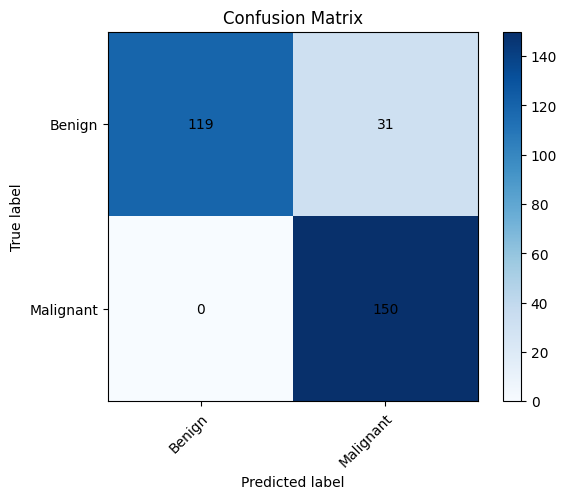

CONFUSION MATRIX: 
 None
ACCURACY:  0.8966666666666666
RECALL:  1.0
PRECISION:  0.8287292817679558
F1:  0.9063444108761329
10/10 [==============================] - 1s 87ms/step


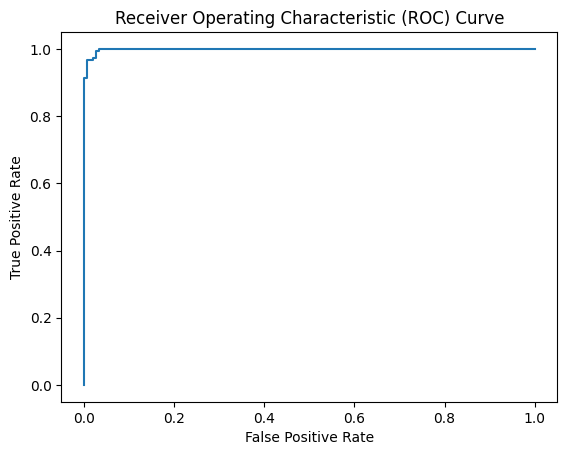

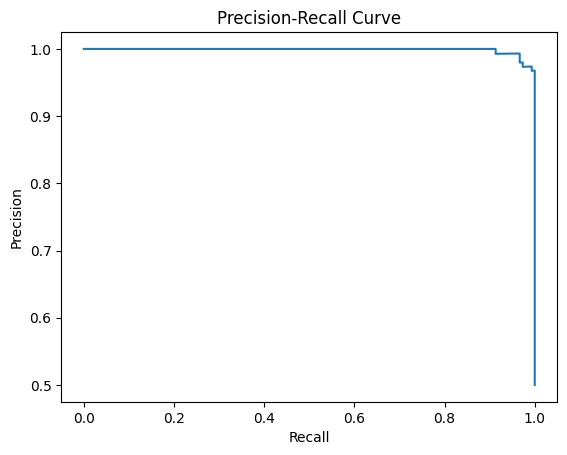

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.71      1.00      0.83        25

    accuracy                           0.80        50
   macro avg       0.86      0.80      0.79        50
weighted avg       0.86      0.80      0.79        50



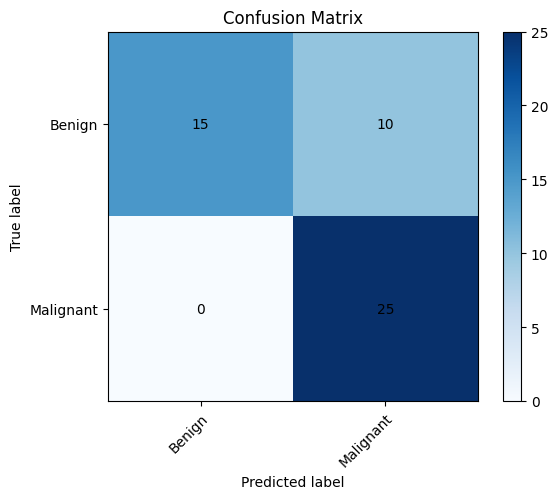

CONFUSION MATRIX: 
 None
ACCURACY:  0.8
RECALL:  1.0
PRECISION:  0.7142857142857143
F1:  0.8333333333333333
2/2 [==============================] - 0s 80ms/step


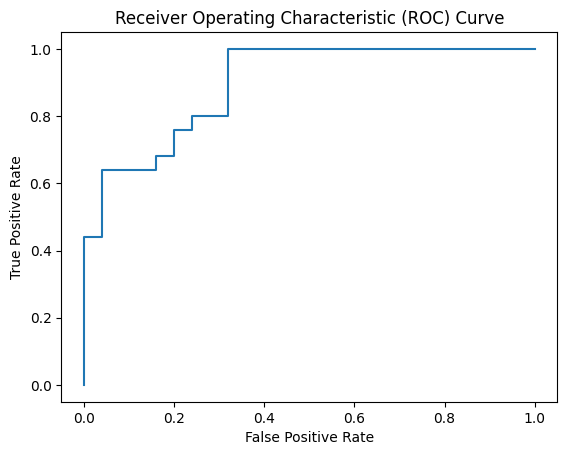

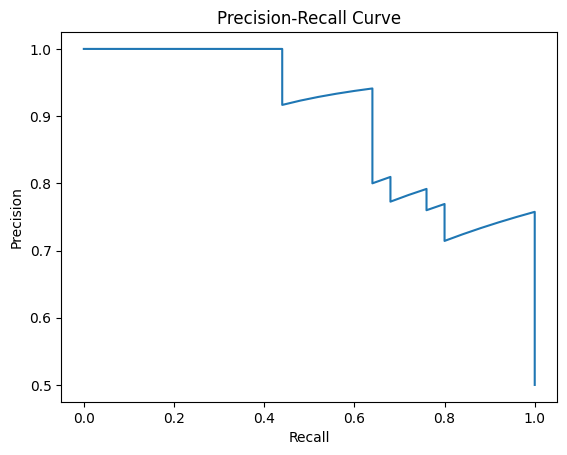

------------------------------------------------------
------------------------------------------------------


In [30]:
results(D_net_model, X_test, X_train, y_train_, y_test_)

In [61]:
# Prediction of values
y_test_pred = D_net_model.predict(X_test)
y_train_pred = D_net_model.predict(X_train)

# labeling the values
y_test_pred_D_net_model = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] > y_test_pred[i][1]:
        y_test_pred_D_net_model.append(0)
    else:
        y_test_pred_D_net_model.append(1)

y_train_pred_D_net_model = []
for i in range(len(y_train_pred)):
    if y_train_pred[i][0] > y_train_pred[i][1]:
        y_train_pred_D_net_model.append(0)
    else:
        y_train_pred_D_net_model.append(1)

10/10 [==============================] - 1s 91ms/step


In [76]:
# Prediction of values
y_test_pred_D_net = D_net_model.predict(X_test)
y_train_pred_D_net = D_net_model.predict(X_train)

10/10 [==============================] - 1s 91ms/step


# Inception

In [49]:
from keras.applications import InceptionV3

# Load the InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
Incep_model = Sequential()
Incep_model.add(base_model)
Incep_model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dropout(0.3))
Incep_model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
Incep_model.add(Dense(512, activation = 'relu'))
Incep_model.add(Dense(32, activation = 'relu'))
Incep_model.add(Dense(2, activation='softmax'))

# model summary
Incep_model.summary()

# Compile the model
Incep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 51200)             0         
                                                                 
 dense_64 (Dense)            (None, 1024)              52429824  
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dense_66 (Dense)            (None, 32)                16416     
                                                                 
 dense_67 (Dense)            (None, 2)                 66        
                                                      

Epoch 1/10
10/10 [==============================] - 10s 220ms/step - loss: 19.7458 - accuracy: 0.5367
Epoch 2/10
10/10 [==============================] - 1s 75ms/step - loss: 8.8378 - accuracy: 0.6100
Epoch 3/10
10/10 [==============================] - 1s 75ms/step - loss: 4.7112 - accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 1s 74ms/step - loss: 2.6455 - accuracy: 0.7933
Epoch 5/10
10/10 [==============================] - 1s 76ms/step - loss: 0.3450 - accuracy: 0.9433
Epoch 6/10
10/10 [==============================] - 1s 75ms/step - loss: 0.1474 - accuracy: 0.9567
Epoch 7/10
10/10 [==============================] - 1s 75ms/step - loss: 0.1286 - accuracy: 0.9767
Epoch 8/10
10/10 [==============================] - 1s 74ms/step - loss: 0.0247 - accuracy: 0.9933
Epoch 9/10
10/10 [==============================] - 1s 76ms/step - loss: 6.7966e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 1s 66ms/step
------------------------------------

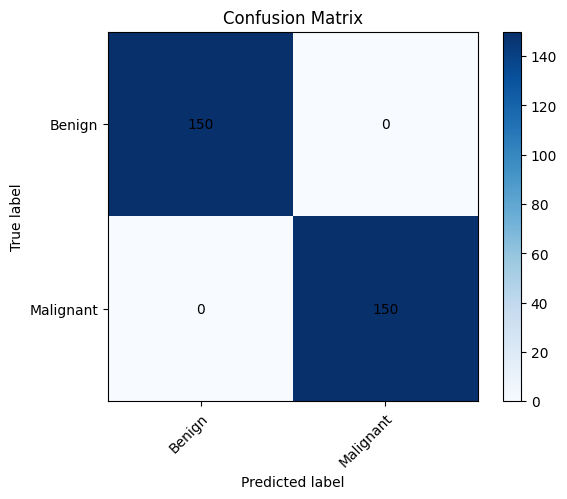

CONFUSION MATRIX: 
 None
ACCURACY:  1.0
RECALL:  1.0
PRECISION:  1.0
F1:  1.0
10/10 [==============================] - 1s 67ms/step


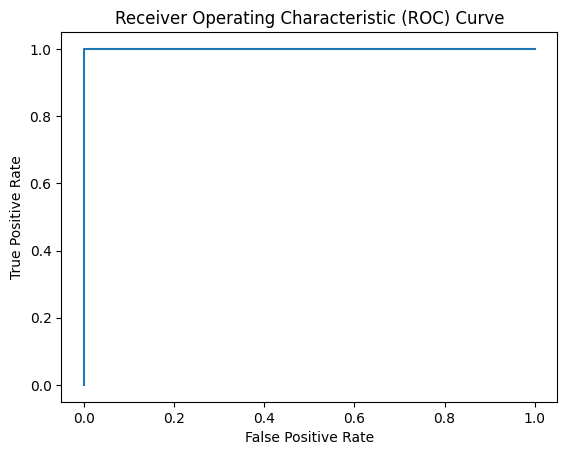

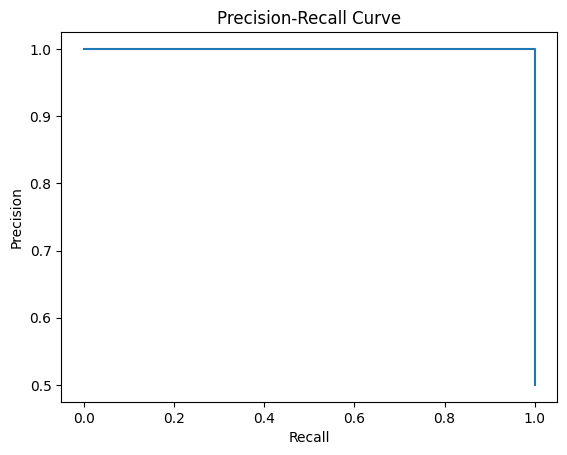

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        25
           1       0.82      0.56      0.67        25

    accuracy                           0.72        50
   macro avg       0.75      0.72      0.71        50
weighted avg       0.75      0.72      0.71        50



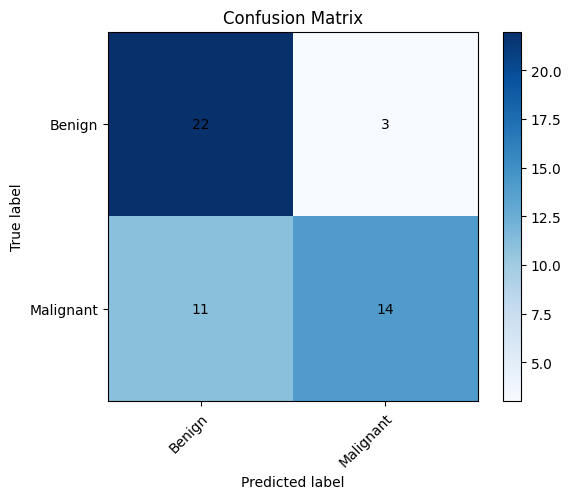

CONFUSION MATRIX: 
 None
ACCURACY:  0.72
RECALL:  0.56
PRECISION:  0.8235294117647058
F1:  0.6666666666666666
2/2 [==============================] - 0s 59ms/step


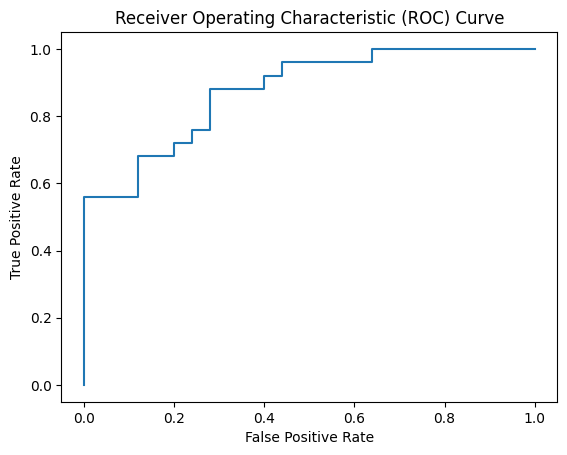

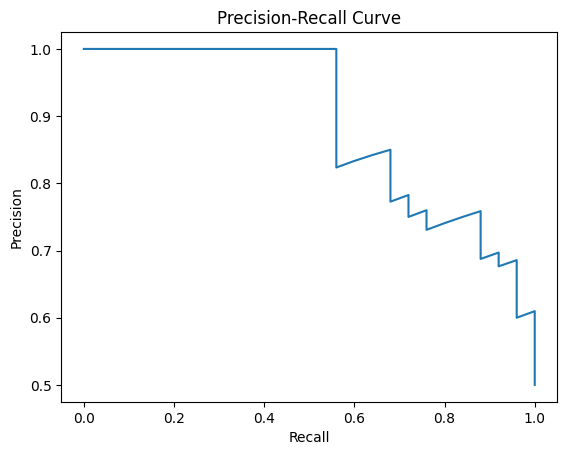

------------------------------------------------------
------------------------------------------------------


In [50]:
# Train the model
Incep_model.fit(X_train, y_train, epochs=10, batch_size=32)

results(Incep_model, X_test, X_train, y_train_, y_test_)

In [69]:
# Prediction of values
y_test_pred = Incep_model.predict(X_test)
y_train_pred = Incep_model.predict(X_train)

# labeling the values
y_test_pred_Incep_model = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] > y_test_pred[i][1]:
        y_test_pred_Incep_model.append(0)
    else:
        y_test_pred_Incep_model.append(1)

y_train_pred_Incep_model = []
for i in range(len(y_train_pred)):
    if y_train_pred[i][0] > y_train_pred[i][1]:
        y_train_pred_Incep_model.append(0)
    else:
        y_train_pred_Incep_model.append(1)

10/10 [==============================] - 1s 73ms/step


In [75]:
y_test_pred_Incep = Incep_model.predict(X_test)
y_train_pred_Incep = Incep_model.predict(X_train)

10/10 [==============================] - 1s 66ms/step


# MobileNet

In [39]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Load the MobileNet model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the MobileNet base and a custom classification layer
mob_net_model = Sequential()
mob_net_model.add(base_model)
mob_net_model.add(layers.Flatten())

# mob_net_model.add(Dense(1024, activation='relu'))
mob_net_model.add(Dense(1024, activation='relu'))
mob_net_model.add(Dense(512, activation='relu'))
mob_net_model.add(Dense(2, activation='softmax'))
mob_net_model.summary()
# Compile the model
mob_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mob_net_model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 50176)             0         
                                                                 
 dense_46 (Dense)            (None, 1024)              51381248  
                                                                 
 dense_47 (Dense)            (None, 512)               524800    
                                                                 
 dense_48 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 55,135,938
Trainable params: 51,907,074
Non-trainable params: 3,228,864
_________________________________

10/10 [==============================] - 0s 42ms/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



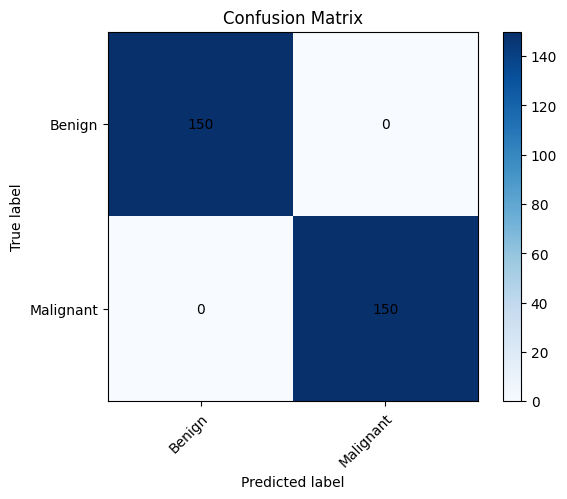

CONFUSION MATRIX: 
 None
ACCURACY:  1.0
RECALL:  1.0
PRECISION:  1.0
F1:  1.0
10/10 [==============================] - 0s 34ms/step


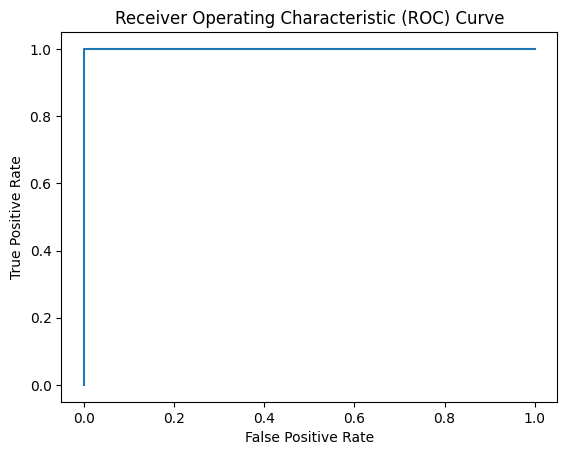

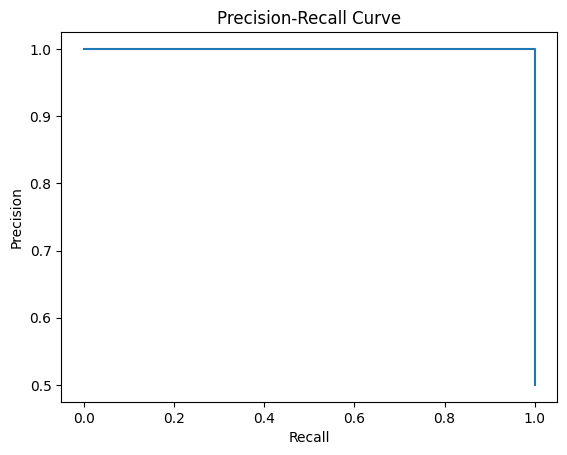

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.85      0.68      0.76        25

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



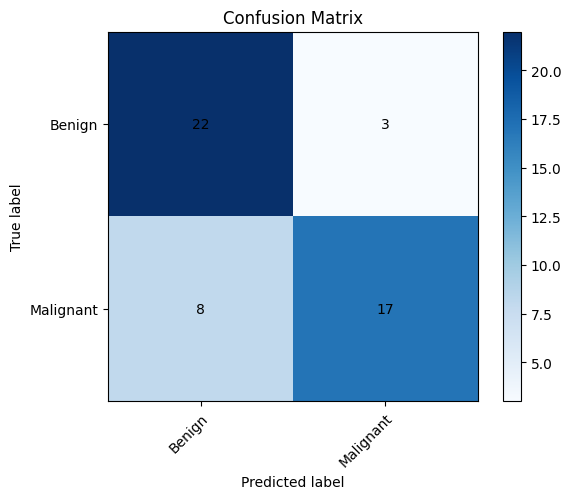

CONFUSION MATRIX: 
 None
ACCURACY:  0.78
RECALL:  0.68
PRECISION:  0.85
F1:  0.7555555555555556
2/2 [==============================] - 0s 30ms/step


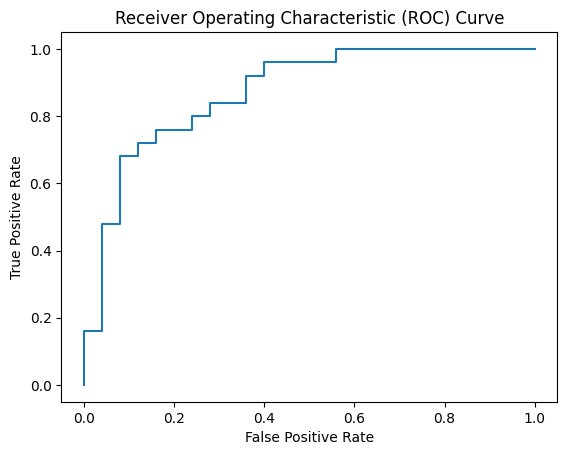

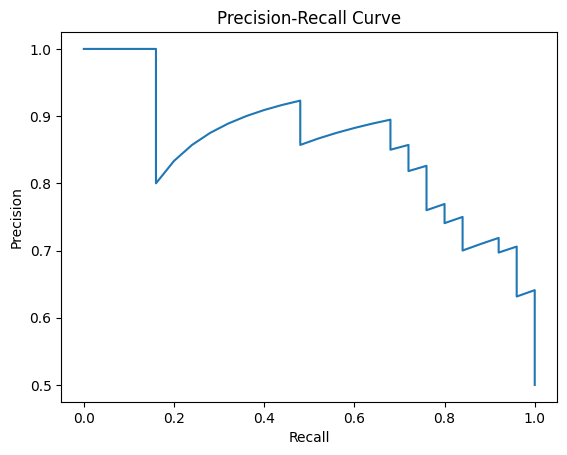

------------------------------------------------------
------------------------------------------------------


In [40]:
results(mob_net_model, X_test, X_train, y_train_, y_test_)

In [68]:
# Prediction of values
y_test_pred = mob_net_model.predict(X_test)
y_train_pred = mob_net_model.predict(X_train)

# labeling the values
y_test_pred_mob_net_model = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] > y_test_pred[i][1]:
        y_test_pred_mob_net_model.append(0)
    else:
        y_test_pred_mob_net_model.append(1)

y_train_pred_mob_net_model = []
for i in range(len(y_train_pred)):
    if y_train_pred[i][0] > y_train_pred[i][1]:
        y_train_pred_mob_net_model.append(0)
    else:
        y_train_pred_mob_net_model.append(1)

10/10 [==============================] - 0s 41ms/step


In [74]:
# Prediction of values
y_test_pred_mob = mob_net_model.predict(X_test)
y_train_pred_mob = mob_net_model.predict(X_train)

10/10 [==============================] - 0s 41ms/step


#Resnet

In [51]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense

# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the ResNet50 base and a custom classification layer
Res_model = Sequential()
Res_model.add(base_model)
Res_model.add(layers.Flatten())

Res_model.add(Dense(512, activation='relu'))
Res_model.add(Dense(32, activation='relu'))
Res_model.add(Dense(2, activation='softmax'))

Res_model.summary()
# Compile the model
Res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Res_model.fit(X_train, y_train, epochs=10, batch_size=32)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_16 (Flatten)        (None, 100352)            0         
                                                                 
 dense_68 (Dense)            (None, 512)               51380736  
                                                                 
 dense_69 (Dense)            (None, 32)                16416     
                                                                 
 dense_70 (Dense)            (None, 2)                 66        
                                                                 
Total params: 74,984,930
Trainable params: 51,397,218
Non-trainable params: 23,587,712
_________________________________

10/10 [==============================] - 1s 91ms/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       150
           1       1.00      0.04      0.08       150

    accuracy                           0.52       300
   macro avg       0.76      0.52      0.38       300
weighted avg       0.76      0.52      0.38       300



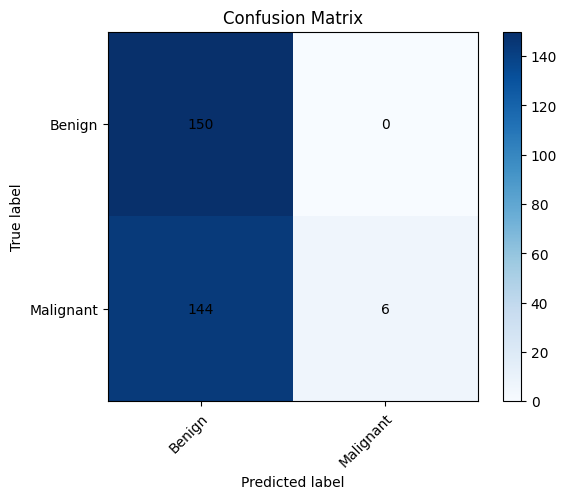

CONFUSION MATRIX: 
 None
ACCURACY:  0.52
RECALL:  0.04
PRECISION:  1.0
F1:  0.07692307692307693
10/10 [==============================] - 1s 92ms/step


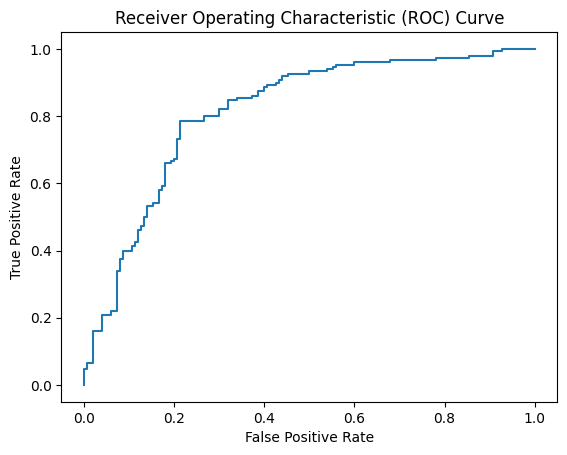

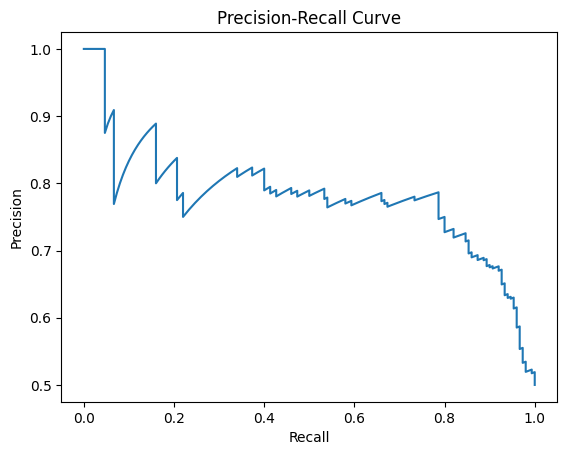

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        25
           1       0.00      0.00      0.00        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


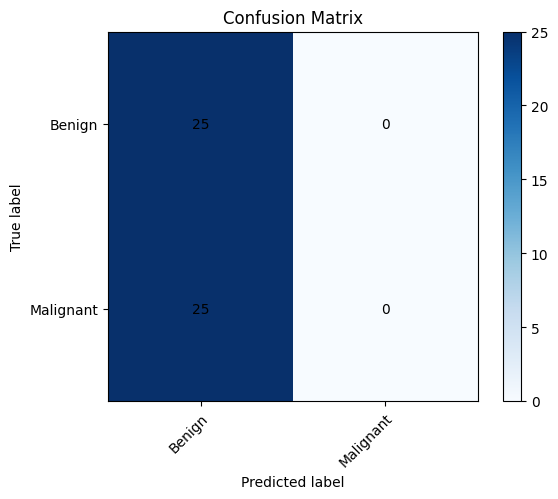

CONFUSION MATRIX: 
 None
ACCURACY:  0.5
RECALL:  0.0
PRECISION:  0.0
F1:  0.0
1/2 [==============>...............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 90ms/step


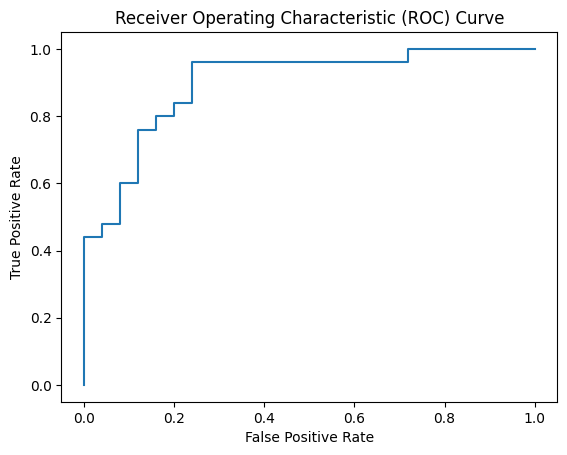

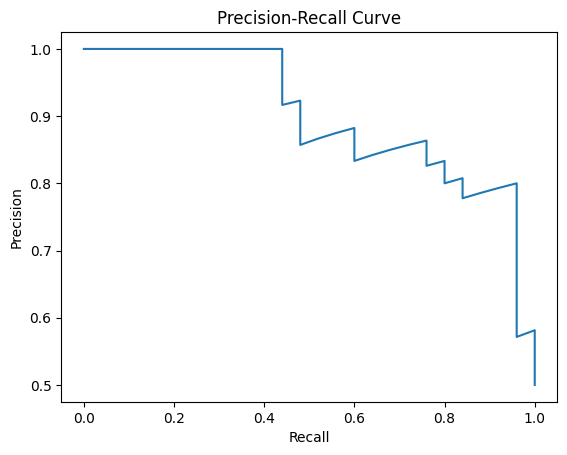

------------------------------------------------------
------------------------------------------------------


In [52]:
results(Res_model, X_test, X_train, y_train_, y_test_)

# VGG

In [41]:
from keras.applications import VGG16
from keras.layers import Dropout

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the VGG16 base and a custom classification layer
vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.2))
vgg_model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.2))
vgg_model.add(Dense(32, activation = 'relu'))
vgg_model.add(Dense(2, activation='softmax'))

vgg_model.summary()

# Compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg_model.fit(X_train, y_train, epochs=10, batch_size=32)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_49 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_50 (Dense)            (None, 512)               524800    
                                                                 
 dense_51 (Dense)            (None, 32)                16416     
                                                                 
 dense_52 (Dense)            (None, 2)                 66        
                                                      

10/10 [==============================] - 1s 124ms/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       150
           1       0.91      1.00      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



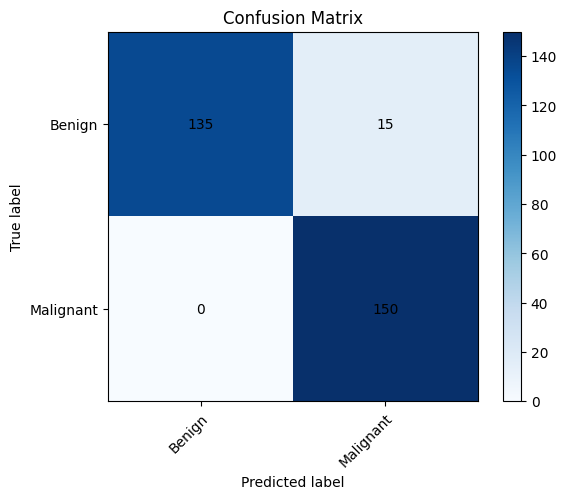

CONFUSION MATRIX: 
 None
ACCURACY:  0.95
RECALL:  1.0
PRECISION:  0.9090909090909091
F1:  0.9523809523809523
10/10 [==============================] - 1s 122ms/step


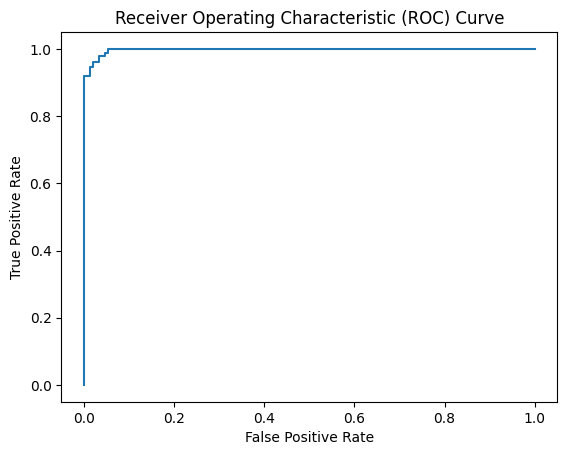

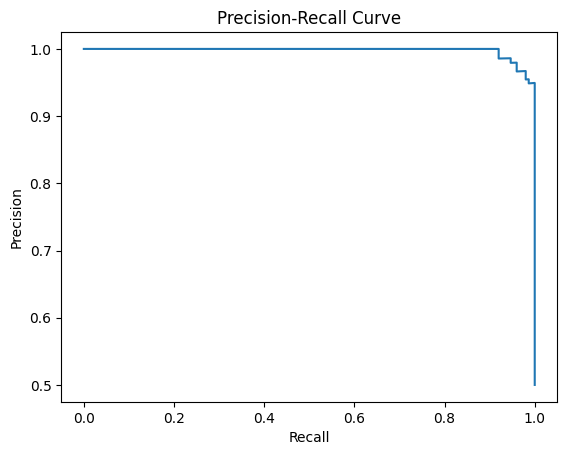

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.74      0.92      0.82        25

    accuracy                           0.80        50
   macro avg       0.82      0.80      0.80        50
weighted avg       0.82      0.80      0.80        50



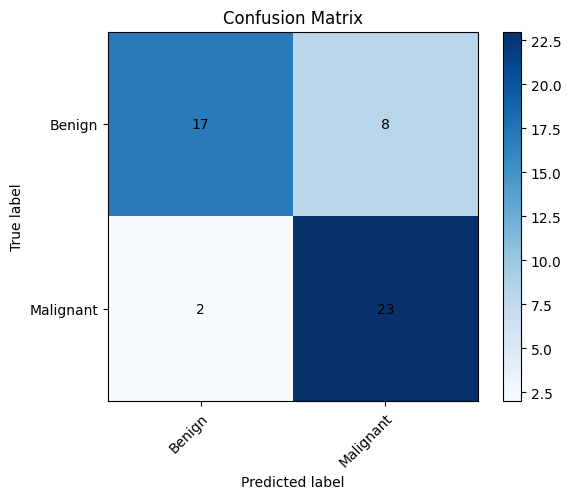

CONFUSION MATRIX: 
 None
ACCURACY:  0.8
RECALL:  0.92
PRECISION:  0.7419354838709677
F1:  0.8214285714285714
2/2 [==============================] - 0s 117ms/step


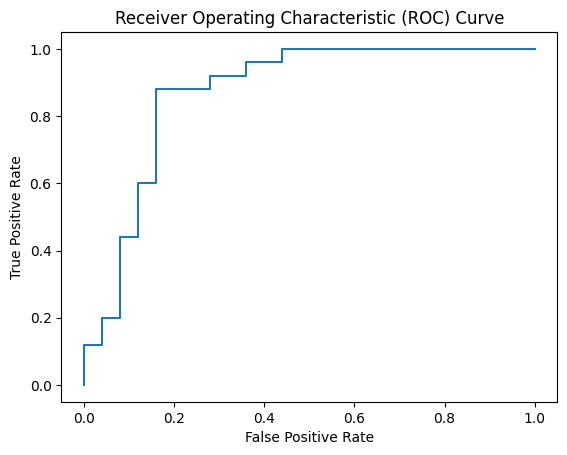

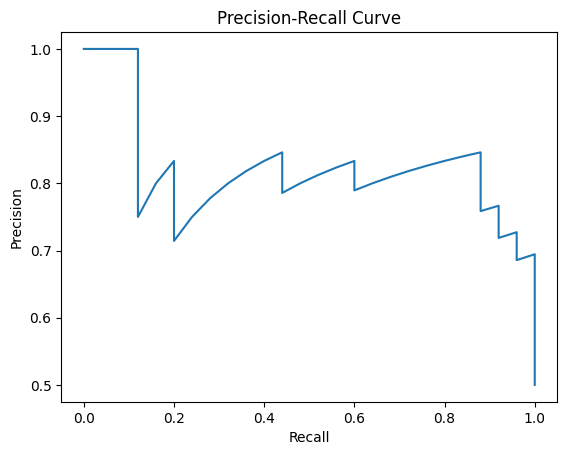

------------------------------------------------------
------------------------------------------------------


In [42]:
results(vgg_model, X_test, X_train, y_train_, y_test_)

In [73]:
# Prediction of values
y_test_pred_vgg = vgg_model.predict(X_test)
y_train_pred_vgg = vgg_model.predict(X_train)

10/10 [==============================] - 1s 155ms/step


In [65]:
# Prediction of values
y_test_pred = vgg_model.predict(X_test)
y_train_pred = vgg_model.predict(X_train)

# labeling the values
y_test_pred_vgg_model = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] > y_test_pred[i][1]:
        y_test_pred_vgg_model.append(0)
    else:
        y_test_pred_vgg_model.append(1)

y_train_pred_vgg_model = []
for i in range(len(y_train_pred)):
    if y_train_pred[i][0] > y_train_pred[i][1]:
        y_train_pred_vgg_model.append(0)
    else:
        y_train_pred_vgg_model.append(1)

10/10 [==============================] - 1s 156ms/step





# Voting Classifier on Transfer Learning models

In [78]:
# Combine the predictions using majority voting or averaging

test_predictions = np.argmax(y_test_pred_vgg + y_test_pred_mob + y_test_pred_Incep + y_test_pred_D_net + y_test_pred_Xcep,  axis=1)
train_predictions = np.argmax(y_train_pred_vgg + y_train_pred_mob + y_train_pred_Incep + y_train_pred_D_net + y_train_pred_Xcep,  axis=1)


###Train Predictions

In [86]:
print(classification_report(train_predictions, y_train_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [89]:
print(confusion_matrix(train_predictions, y_train_))

[[150   0]
 [  0 150]]


In [88]:
print('Accuracy score: ', accuracy_score(train_predictions, y_train_))
print('Recall score: ', recall_score(train_predictions, y_train_))
print('precision score: ', precision_score(train_predictions, y_train_))
print('f1 score: ', f1_score(train_predictions, y_train_))

Accuracy score:  1.0
Recall score:  1.0
precision score:  1.0
f1 score:  1.0


### Test Predictions

In [90]:
print(classification_report(test_predictions, y_test_))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [91]:
print(confusion_matrix(test_predictions, y_test_))

[[22  5]
 [ 3 20]]


In [92]:
print('Accuracy score: ', accuracy_score(test_predictions, y_test_))
print('Recall score: ', recall_score(test_predictions, y_test_))
print('precision score: ', precision_score(test_predictions, y_test_))
print('f1 score: ', f1_score(test_predictions, y_test_))

Accuracy score:  0.84
Recall score:  0.8695652173913043
precision score:  0.8
f1 score:  0.8333333333333333
